In [22]:
#add versions to libraries
import pandas as pd # data analysis and manipulation tool
import numpy as np # Numerical computing tools
import seaborn as sns  # visualization library
import matplotlib.pyplot as plt  # another visualization library
import scipy as sp

import re
import typing

In [23]:
df = pd.read_csv('virus_hw2.csv')

In [24]:
df.head()

,PatientID,Address,AgeGroup,AvgHouseholdExpenseOnPresents,AvgHouseholdExpenseOnSocialGames,AvgHouseholdExpenseParkingTicketsPerYear,AvgMinSportsPerDay,AvgTimeOnSocialMedia,AvgTimeOnStuding,BMI,...,pcrResult16,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9,TestResultsCode
0,0,8520 Dougherty Common Apt. 318\nLake Annamouth...,3.0,719.607334,NaN,NaN,NaN,NaN,NaN,34.357918,...,0.561232,-0.679339,0.100034,0.727264,NaN,-0.471150,-1.353009,-0.535733,-1.572741,flue_Spreader_NotatRisk
1,1,"9338 Griffin Route\nThorntonshire, WY 36917",NaN,NaN,NaN,NaN,103.402401,NaN,NaN,NaN,...,NaN,-1.586196,NaN,-0.355124,-0.347716,-0.382849,-0.794809,-0.531691,-6.764451,measles_NotSpreader_NotatRisk
2,2,"8350 Adam Streets\nLake Angelaberg, MS 13029",NaN,270.970619,562.336350,1151.389973,NaN,NaN,NaN,NaN,...,0.743885,0.351076,-1.977511,-1.234402,0.258255,1.271829,-0.595020,2.789755,1.646610,not_detected_NotSpreader_atRisk
3,3,"1439 Mason Spring Suite 287\nWest Marissa, VT ...",3.0,485.443587,NaN,949.958138,125.602363,NaN,NaN,31.214112,...,2.612904,0.322986,-1.463554,0.366601,NaN,0.398144,-1.100643,1.162578,NaN,covid_Spreader_NotatRisk
4,4,"621 Johnny Plain Apt. 687\nAmyton, MA 61425",2.0,757.334792,1517.726855,NaN,NaN,NaN,NaN,31.032410,...,0.506867,-1.406444,NaN,1.546139,0.217398,0.501794,1.669463,0.498309,-2634.725478,covid_Spreader_NotatRisk


In [25]:
df=df.drop(columns=['PatientID', 'Address']) #utterly meaningless to disease diagnosis

# Change TestResultsCode to three labels, disease, contagious, risk

In [29]:
#test result classified by labels
li = df.TestResultsCode.tolist()
labels =  [ item.split('_') for item in li ] 
for item in labels:
    if len(item)==4:
        add =  item[0]+item[1]     
        item = item.insert( 0, add  )
for item in labels:
    if 'not' in item:
        item.remove('not')
    if 'detected' in item:
        item.remove('detected')
labels

[['flue', 'Spreader', 'NotatRisk'],
 ['measles', 'NotSpreader', 'NotatRisk'],
 ['notdetected', 'NotSpreader', 'atRisk'],
 ['covid', 'Spreader', 'NotatRisk'],
 ['covid', 'Spreader', 'NotatRisk'],
 ['flue', 'Spreader', 'atRisk'],
 ['covid', 'NotSpreader', 'atRisk'],
 ['notdetected', 'Spreader', 'atRisk'],
 ['notdetected', 'Spreader', 'NotatRisk'],
 ['cold', 'NotSpreader', 'atRisk'],
 ['cold', 'NotSpreader', 'atRisk'],
 ['measles', 'NotSpreader', 'atRisk'],
 ['measles', 'NotSpreader', 'NotatRisk'],
 ['covid', 'Spreader', 'NotatRisk'],
 ['covid', 'NotSpreader', 'atRisk'],
 ['flue', 'Spreader', 'NotatRisk'],
 ['cold', 'Spreader', 'NotatRisk'],
 ['notdetected', 'NotSpreader', 'atRisk'],
 ['flue', 'Spreader', 'atRisk'],
 ['cold', 'NotSpreader', 'atRisk'],
 ['cmv', 'Spreader', 'atRisk'],
 ['covid', 'NotSpreader', 'NotatRisk'],
 ['covid', 'Spreader', 'NotatRisk'],
 ['cold', 'NotSpreader', 'atRisk'],
 ['measles', 'Spreader', 'NotatRisk'],
 ['covid', 'Spreader', 'atRisk'],
 ['cmv', 'Spreader', 'a

In [34]:
#one-hot encode the test results
disease = [ la[0] for la in labels ]
spread = [  la[1] for la in labels  ]
risk = [  la[2] for la in labels  ]

disease_encode = pd.Series( disease  ).str.get_dummies()
spread_encode = pd.Series( spread  ).str.get_dummies()
risk_encode = pd.Series( risk  ).str.get_dummies()

disease_encode = pd.DataFrame( disease_encode )
spread_encode = pd.DataFrame( spread_encode )
risk_encode = pd.DataFrame( risk_encode)


In [39]:
#interate one hot encoding of test results back to df
df2 = df
df2 = df2.drop(columns = 'TestResultsCode')
df2.head()

,AgeGroup,AvgHouseholdExpenseOnPresents,AvgHouseholdExpenseOnSocialGames,AvgHouseholdExpenseParkingTicketsPerYear,AvgMinSportsPerDay,AvgTimeOnSocialMedia,AvgTimeOnStuding,BMI,BloodType,CurrentLocation,...,pcrResult15,pcrResult16,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9
0,3.0,719.607334,NaN,NaN,NaN,NaN,NaN,34.357918,NaN,NaN,...,-0.725127,0.561232,-0.679339,0.100034,0.727264,NaN,-0.471150,-1.353009,-0.535733,-1.572741
1,NaN,NaN,NaN,NaN,103.402401,NaN,NaN,NaN,NaN,"(Decimal('68.4111015'), Decimal('-120.794703'))",...,NaN,NaN,-1.586196,NaN,-0.355124,-0.347716,-0.382849,-0.794809,-0.531691,-6.764451
2,NaN,270.970619,562.336350,1151.389973,NaN,NaN,NaN,NaN,NaN,"(Decimal('-27.055268'), Decimal('-45.220383'))",...,NaN,0.743885,0.351076,-1.977511,-1.234402,0.258255,1.271829,-0.595020,2.789755,1.646610
3,3.0,485.443587,NaN,949.958138,125.602363,NaN,NaN,31.214112,AB+,"(Decimal('66.539494'), Decimal('10.495389'))",...,0.080926,2.612904,0.322986,-1.463554,0.366601,NaN,0.398144,-1.100643,1.162578,NaN
4,2.0,757.334792,1517.726855,NaN,NaN,NaN,NaN,31.032410,O+,"(Decimal('-43.228750'), Decimal('14.144745'))",...,0.826434,0.506867,-1.406444,NaN,1.546139,0.217398,0.501794,1.669463,0.498309,-2634.725478


In [40]:
results = pd.concat( [risk_encode, spread_encode, disease_encode], axis=1 )
results.head()

,NotatRisk,atRisk,NotSpreader,Spreader,cmv,cold,covid,flue,measles,notdetected
0,1,0,0,1,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0
2,0,1,1,0,0,0,0,0,0,1
3,1,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,0,0,0


# test, train split

In [41]:
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split( df2, results, test_size=0.33, random_state=33 ) #tr is test results numerically coded
X_test, X_val, y_test, y_val = train_test_split( X_test, y_test , test_size=0.4, random_state=33)

In [42]:
X_train.head()

,AgeGroup,AvgHouseholdExpenseOnPresents,AvgHouseholdExpenseOnSocialGames,AvgHouseholdExpenseParkingTicketsPerYear,AvgMinSportsPerDay,AvgTimeOnSocialMedia,AvgTimeOnStuding,BMI,BloodType,CurrentLocation,...,pcrResult15,pcrResult16,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9
2794,4.0,439.490254,892.585974,757.106040,145.831467,NaN,NaN,30.869520,NaN,NaN,...,0.835182,2.149420,-0.366425,NaN,NaN,NaN,0.981632,NaN,2.017933,1.472229
4431,2.0,448.945921,922.481436,NaN,58.664801,264.098554,134.914126,29.329071,A-,"(Decimal('-2.2998625'), Decimal('-79.665820'))",...,1.049350,1.379876,0.206253,-2.294759,NaN,0.876979,1.294752,-0.262109,2.731332,1.379438
4910,3.0,NaN,NaN,354.031584,82.087869,NaN,NaN,26.545667,A-,"(Decimal('6.2666935'), Decimal('24.324291'))",...,-1.406736,0.723018,0.430426,-2.932431,0.211129,-1.580825,-1.335228,-1.099206,-2.383492,0.672456
4732,2.0,524.276541,1052.650270,1343.069217,110.680443,NaN,NaN,28.629544,A-,NaN,...,-0.750423,2.310137,-0.378732,-1.676110,0.561520,NaN,-0.736728,-0.497809,-1.349503,1.053950
2287,3.0,495.017715,1022.293222,1155.976331,188.735078,5.629694,NaN,28.410360,NaN,"(Decimal('-1.4691435'), Decimal('-150.963954'))",...,0.440568,1.728319,NaN,-0.737540,-0.028437,-0.222513,0.684565,-0.620629,1.596607,NaN


# Data Description and Attribute Type

In [44]:
X_train.describe()

,AgeGroup,AvgHouseholdExpenseOnPresents,AvgHouseholdExpenseOnSocialGames,AvgHouseholdExpenseParkingTicketsPerYear,AvgMinSportsPerDay,AvgTimeOnSocialMedia,AvgTimeOnStuding,BMI,DisciplineScore,HappinessScore,...,pcrResult15,pcrResult16,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9
count,2666.000000,2656.000000,2653.000000,2650.000000,2715.000000,508.000000,497.000000,2664.000000,2677.000000,2708.00000,...,2637.000000,2697.000000,2684.000000,2669.000000,2651.000000,2675.000000,2694.000000,2680.000000,2666.000000,2675.000000
mean,3.382596,545.373594,1092.674226,1130.938664,97.270967,300.332287,184.766164,30.679013,5.307434,6.28582,...,-0.784229,1.852176,-2.926716,-2.286873,0.096154,-0.003048,-0.087406,-2.195340,0.025949,3.313793
std,1.300275,152.950323,305.584844,310.276561,53.660737,1282.582656,105.907585,22.080196,4.710608,1.66504,...,83.085072,1.538934,179.553195,5.805771,1.243720,0.688197,63.386787,128.295980,1.316549,206.277867
min,1.000000,139.611769,261.258274,151.752961,6.293718,2.042927,0.976318,14.211963,0.000000,1.00000,...,-1705.948613,0.095814,-8244.852556,-21.751995,-3.901710,-2.069859,-1210.476970,-1582.118196,-3.746668,-7277.049917
25%,3.000000,444.481346,891.669616,946.818428,53.510460,82.417304,86.026585,26.224656,4.000000,5.00000,...,-0.576719,0.967825,-0.500508,-3.369756,-0.731601,-0.385506,-0.528349,-1.019061,-0.983977,-0.244559
50%,3.000000,546.519887,1091.695342,1148.274422,93.696913,162.568876,176.516770,29.008263,5.000000,6.00000,...,0.054664,1.498774,0.047162,-1.831134,0.087979,0.005090,0.008647,-0.438176,-0.010362,0.703260
75%,4.000000,655.650382,1314.820287,1350.793283,134.800130,264.133507,298.051041,31.821517,6.000000,7.00000,...,0.750538,2.228371,0.514413,-0.919412,0.992248,0.387823,0.570698,1.015411,1.045306,1.612274
max,8.000000,977.077398,1893.719268,1964.871857,305.000513,16187.314327,357.765779,434.149846,80.000000,10.00000,...,867.952501,19.150648,1562.045738,207.952829,4.698187,1.983295,1157.115485,1817.978350,3.512788,3897.157552


In [46]:
X_train.dtypes

AgeGroup                                    float64
AvgHouseholdExpenseOnPresents               float64
AvgHouseholdExpenseOnSocialGames            float64
AvgHouseholdExpenseParkingTicketsPerYear    float64
AvgMinSportsPerDay                          float64
AvgTimeOnSocialMedia                        float64
AvgTimeOnStuding                            float64
BMI                                         float64
BloodType                                    object
CurrentLocation                              object
DateOfPCRTest                                object
DisciplineScore                             float64
HappinessScore                              float64
Job                                          object
NrCousins                                   float64
SelfDeclarationOfIllnessForm                 object
Sex                                          object
StepsPerYear                                float64
SyndromeClass                               float64
TimeOnSocial

# Anomaly and Outlier Detection

# BMI
## body mass index is a weight/ (height)^2 , then values above 45 are nearly physically impossible

In [47]:
bmi = np.array(df.BMI.fillna(np.nanmedian(df.BMI)).tolist()) 
np.amax(bmi)

434.1498462223252

In [48]:
bmi[bmi>45]=45 #truncate outliers
bmi

array([34.357918  , 29.05044672, 29.05044672, ..., 30.28286709,
       24.1362321 , 29.05044672])

In [49]:
fig, ax = plt.subplots()
ax.plot(np.array(np.sort(bmi)))

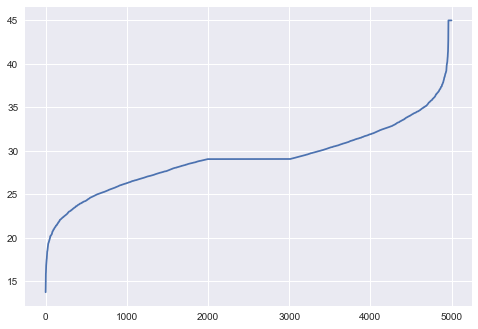

In [50]:
plt.show()

In [51]:
print("variance is {}".format(bmi.var())) #looks like symmetric distribution with average 30 and cutoff accurate from that symmetry
print("mean is {}".format(bmi.mean()))
print("meadian is {}".format(np.median(bmi)))

variance is 15.583658012797805
mean is 29.159395510734768
meadian is 29.050446719385697


In [52]:
df['BloodType']=df['BloodType'].astype('category')
bt=np.array(df.BloodType.cat.codes)
bt=bt[bt != -1]
print(np.histogram(bt))
bt

(array([513, 498, 509,   0, 534, 479,   0, 495, 468, 492], dtype=int64), array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]))


array([2, 6, 1, ..., 7, 4, 4], dtype=int8)

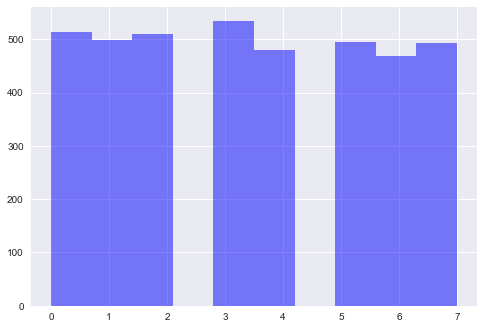

In [53]:
num_bins = 10
n, bins, patches = plt.hist(np.array(bt), num_bins, facecolor='blue', alpha=0.5)
plt.show()

# Feature Transformation-location

In [26]:
x = df.CurrentLocation
x = x.fillna("(Decimal('-67.5342235'), Decimal('147.951103'))")
li = x.tolist()
len(li)

5000

In [27]:
reg='-?\d+\.?\d*'
match="(Decimal('21.434580'), Decimal('-103.928014'))"
re.findall(reg, match)

['21.434580', '-103.928014']

In [28]:
regex = '-?\d+\.?\d*'           

loc = [ [ re.findall(regex, match)[0], re.findall(regex, match)[1]]
                                                for match in li ]


for item in loc:
    item[0]=float(item[0])
    item[1]=float(item[1])
    
locx = np.array([match[0] for match in loc])
locy = np.array([match[1] for match in loc])
locx

array([-67.5342235,  68.4111015, -27.055268 , ..., -68.6266485,
       -67.5342235,  67.0047005])

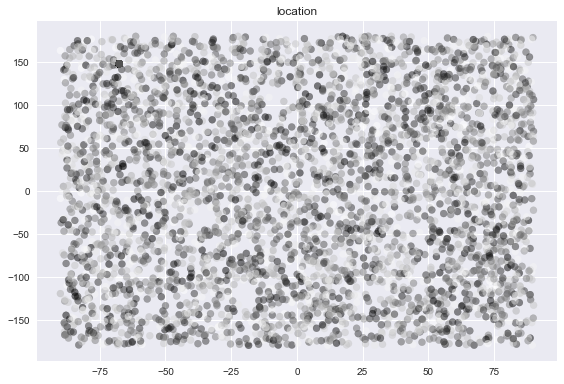

In [223]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook



close = 15151 * np.array(tr)^2

fig, ax = plt.subplots()
ax.scatter(np.array(locx), np.array(locy), c=close,  alpha=0.5)


ax.set_title('location')

ax.grid(True)
fig.tight_layout()

plt.show()

In [224]:
print("variance is {}".format(locx.var()))
print("mean is {}".format(locx.mean()))
print("meadian is {}".format(np.median(locx)))

variance is 2958.039954135813
mean is -11.5031808945
meadian is -19.138428750000003


# Feature Extraction from Location data

## Construct grid from range of latitude and longtitude values, and plot Voronoi diagram 

In [355]:
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)

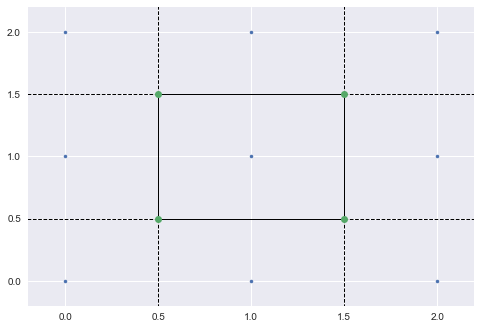

In [356]:
import matplotlib.pyplot as plt
fig = voronoi_plot_2d(vor)
plt.show()

In [225]:
bmi = np.array(df.BMI.fillna(np.nanmedian(df.BMI)).tolist()) 
np.amax(bmi)

434.1498462223252

In [226]:
bmi[bmi>45]=45 #truncate outliers
bmi

array([34.357918  , 29.05044672, 29.05044672, ..., 30.28286709,
       24.1362321 , 29.05044672])

In [227]:
fig, ax = plt.subplots()
ax.plot(np.array(np.sort(bmi)))

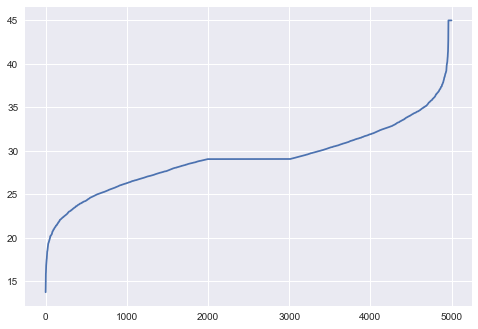

In [228]:
plt.show()

In [229]:
print("variance is {}".format(bmi.var())) #looks like symmetric distribution with average 30 and cutoff accurate from that symmetry
print("mean is {}".format(bmi.mean()))
print("meadian is {}".format(np.median(bmi)))

variance is 15.583658012797805
mean is 29.159395510734768
meadian is 29.050446719385697


In [230]:
df['BloodType']=df['BloodType'].astype('category')
bt=np.array(df.BloodType.cat.codes)
bt=bt[bt != -1]
print(np.histogram(bt))
bt

(array([513, 498, 509,   0, 534, 479,   0, 495, 468, 492], dtype=int64), array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]))


array([2, 6, 1, ..., 7, 4, 4], dtype=int8)

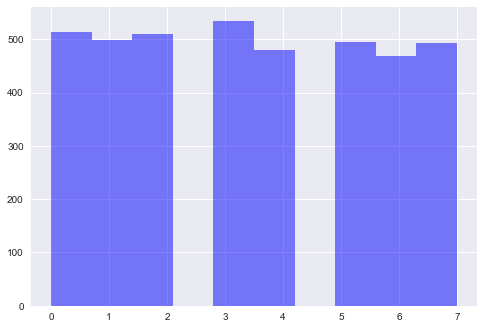

In [231]:
num_bins = 10
n, bins, patches = plt.hist(np.array(bt), num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [232]:
#remove all nan
a = np.array(df.SyndromeClass.fillna(-1))
a

array([ 2.,  3.,  1., ..., -1.,  1., -1.])

In [233]:
tr = np.array(tr)
len(tr)

5000

In [234]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

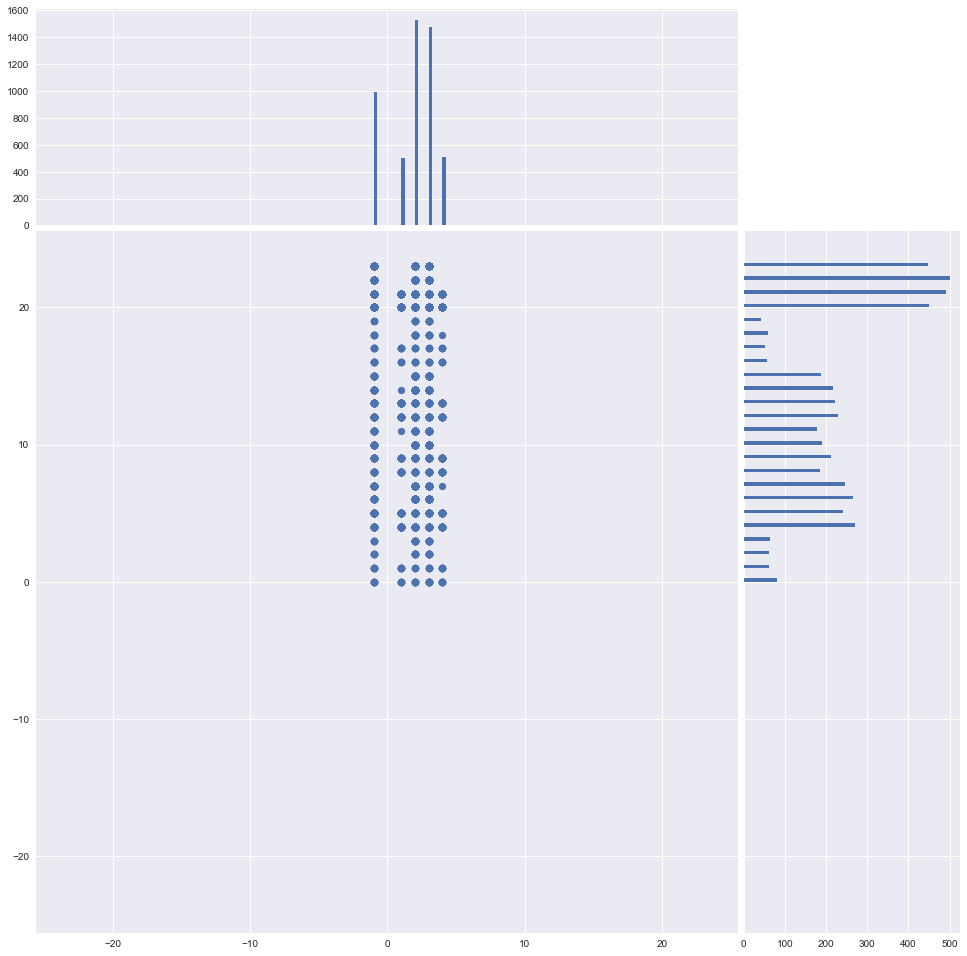

In [235]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(15, 15))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(np.array(a), np.array(tr),  ax, ax_histx, ax_histy)

plt.show()

## On graph we see that absence of symptom categories 1 and 4 indicates the person is not spreading pretty much completely accurately

## contrast pca with scaled/non-scaled pcr results

In [236]:
#standardizing pcr results - works!
from sklearn.preprocessing import StandardScaler 

scalar = StandardScaler()

pcr_result = [ 'pcrResult{}'.format(str(np.int(j))) for j in range(1,17)]

df_scalar = pd.DataFrame(data=None, columns= pcr_result  )


for item in range(1,17):
    df_scalar['pcrResult{}'.format(str(np.int(item)))] = df['pcrResult{}'.format(str(np.int(item)))].fillna( 0 ) #switch to avg
    data = np.array( df_scalar['pcrResult{}'.format(str(np.int(item)))].tolist() )
    data = data.reshape(-1,1)
    data = scalar.fit_transform(data)
    data = np.array(data.reshape(1,-1))
    data= np.array([ i for i in data[0] ])
    df_scalar['pcrResult{}'.format(str(np.int(item)))] = pd.Series(  np.array(data) )
    
df_scalar


,pcrResult1,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9,pcrResult10,pcrResult11,pcrResult12,pcrResult13,pcrResult14,pcrResult15,pcrResult16
0,-0.855873,0.005501,0.433473,0.594662,0.011431,-0.015923,-0.000123,-0.456063,-0.017439,0.003598,-12.978458,-0.006362,0.011903,-0.074372,0.002823,-0.593135
1,-0.419496,-0.001276,0.411493,-0.386168,-0.549897,-0.014278,0.004971,-0.452639,-0.049361,-0.000587,-0.004248,-0.295071,0.015612,-0.077234,0.013660,-0.958354
2,0.354398,0.013201,-0.023033,-1.182944,0.428341,0.016551,0.006794,2.360168,0.002356,-0.007857,0.018331,0.083594,0.047363,-0.072169,0.013660,-0.474274
3,-1.434555,0.012991,0.089901,0.267839,0.011431,0.000273,0.002180,0.982172,-0.007768,-0.007155,0.004386,0.020783,-0.047162,-0.078274,0.014870,0.741982
4,-1.015537,0.000068,0.411493,1.336703,0.362383,0.002204,0.027460,0.419629,-16.207788,0.003598,0.004762,-0.047779,0.080593,-0.067666,0.026012,-0.628512
5,0.106139,0.010826,0.187776,-0.064365,-0.960941,-0.007145,0.009129,-0.002370,-0.009784,-0.003687,0.014340,0.052666,-0.000687,-0.074270,0.023575,-0.183777
6,-0.165567,0.008121,0.292838,0.842013,0.344179,-0.027487,0.001018,-1.564707,-0.012923,-0.000196,-0.015679,0.021086,0.048004,-0.071642,0.013660,-0.219864
7,-0.165567,0.017732,-0.005910,-0.173014,0.048551,-0.007145,0.012224,-0.749136,0.000717,0.003598,-0.007862,0.052666,0.003271,-0.078274,0.002656,0.738756
8,-0.939441,0.014208,0.411493,-0.064365,-1.309056,-0.026166,0.012224,-1.485457,-0.001636,0.003598,-0.013933,0.092210,0.139393,-0.068580,-0.003212,-0.298026
9,0.849807,0.011607,0.411493,-0.064365,-0.878629,-0.007145,0.004472,0.241128,0.010270,-0.003109,0.000586,0.079427,0.184473,-0.054872,0.010769,-0.958354


In [237]:
#quantile transformer- works!
import numpy as np
from sklearn.preprocessing import QuantileTransformer
rng = np.random.RandomState(0)
qt = QuantileTransformer(n_quantiles=1000, random_state=0, output_distribution = 'normal')

pcr_result = [ 'pcrResult{}'.format(str(np.int(j))) for j in range(1,17)]

df_qt = pd.DataFrame(data = None, columns= pcr_result  )


for item in range(1,17):
    df_qt['pcrResult{}'.format(str(np.int(item)))] = df['pcrResult{}'.format(str(np.int(item)))].fillna( 0 ) #switch to avg
    data = np.array( df_qt['pcrResult{}'.format(str(np.int(item)))].tolist() )
    data = data.reshape(-1,1)
    data = qt.fit_transform(data) 
    data = np.array(data.reshape(1,-1))
    data= np.array([ i for i in data[0] ])
    df_qt['pcrResult{}'.format(str(np.int(item)))] = pd.Series(  np.array(data) )
    
df_qt


,pcrResult1,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9,pcrResult10,pcrResult11,pcrResult12,pcrResult13,pcrResult14,pcrResult15,pcrResult16
0,-0.970942,-1.041153,1.927152,0.693429,0.000000,-0.755525,-1.483368,-0.519320,-1.606622,0.165095,-2.996151,-1.281709,-0.510879,-0.230145,-0.994368,-0.663107
1,-0.589010,-1.602078,1.107059,-0.568375,-0.757204,-0.652979,-0.518074,-0.516793,-1.871991,-0.404406,-0.754593,-1.838188,-0.209787,-0.749396,-0.012546,-5.199338
2,0.556039,0.604767,-0.313924,-1.215566,0.652712,2.234148,-0.349372,2.437965,0.873328,-1.619879,1.173585,0.854899,0.271232,-0.009345,-0.012546,-0.500679
3,-1.468048,0.564501,-0.068832,0.431022,0.000000,0.609561,-0.988225,0.949920,-0.400635,-1.457174,-0.280816,-0.830363,-1.007524,-5.199338,0.304686,1.153483
4,-1.092511,-1.506043,1.107059,1.326979,0.591434,0.739856,1.286277,0.515023,-3.166594,0.165095,-0.022584,-1.728371,0.521301,0.449460,1.437115,-0.714502
5,0.352223,0.228832,0.185982,-0.061513,-1.098189,-0.015055,-0.208367,0.013801,-0.909607,-0.771297,0.635322,-0.022584,-0.620510,-0.212572,0.687795,-0.033760
6,-0.113152,-0.704935,0.480745,0.867448,0.573050,-1.769422,-1.251762,-1.556470,-1.221933,-0.368235,-1.858782,-0.823995,0.275449,0.037968,-0.012546,-0.082634
7,-0.113152,1.501585,-0.281865,-0.404435,0.298498,-0.015055,0.146048,-0.741365,0.676852,0.165095,-1.019214,-0.022584,-0.587753,-5.199338,-1.015014,1.146569
8,-1.028981,0.774479,1.107059,-0.061513,-1.341487,-1.647592,0.146048,-1.470121,0.446214,0.165095,-1.671209,1.035695,0.873139,0.331475,-1.675026,-0.209625
9,0.948558,0.360165,1.107059,-0.061513,-1.041801,-0.015055,-0.585606,0.409274,1.625298,-0.689481,-0.467419,0.774256,1.116424,1.272833,-0.435629,-5.199338


# Visualization

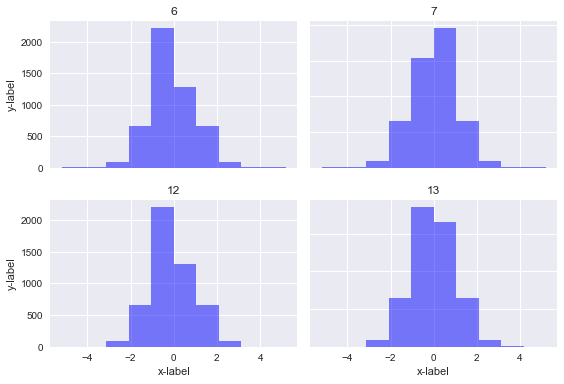

In [238]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(np.array(np.array(df_qt.pcrResult6.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[0, 0].set_title('6')
axs[0, 1].hist(np.array(np.array(df_qt.pcrResult7.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[0, 1].set_title('7')
axs[1, 0].hist(np.array(np.array(df_qt.pcrResult12.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[1, 0].set_title('12')
axs[1, 1].hist(np.array(np.array(df_qt.pcrResult13.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[1, 1].set_title('13')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

ax.grid(True)
fig.tight_layout()

plt.show()

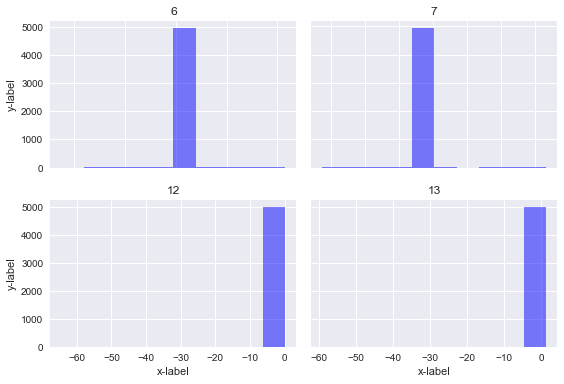

In [239]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(np.array(np.array(df_scalar.pcrResult6.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[0, 0].set_title('6')
axs[0, 1].hist(np.array(np.array(df_scalar.pcrResult7.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[0, 1].set_title('7')
axs[1, 0].hist(np.array(np.array(df_scalar.pcrResult12.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[1, 0].set_title('12')
axs[1, 1].hist(np.array(np.array(df_scalar.pcrResult13.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[1, 1].set_title('13')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

ax.grid(True)
fig.tight_layout()

plt.show()

# Filter Method 1 - PCA
## Rescaled PCR results with mean 0 and variance 1, so that PCA will work properly. Otherwise if a feature takes improportional values in contrast to other feaures then the PCA will overweigh the covariance of that feature with others, assuming there is linear relationship between the features.

In [240]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=5)
pca.fit_transform(df_scalar) #plug in scaled values ( with outliers )

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.16729156 0.07325816 0.06801631 0.06645703 0.0655227 ]
[115.68631964  76.55489811  73.76519778  72.91475856  72.40038449]


In [241]:
pca.get_covariance()

array([[ 9.70246093e-01, -7.12179417e-02, -1.09791651e-01,
         1.33765752e-02,  9.39224202e-03,  1.19400683e-02,
         4.61464933e-02, -1.33303463e-02,  3.39582959e-02,
        -5.42912859e-03,  8.51682995e-03,  7.60792851e-02,
         8.59319428e-02,  3.50019146e-02, -1.30163037e-02,
         1.00188187e-02],
       [-7.12179417e-02,  8.88326375e-01, -5.97579433e-02,
        -1.00571609e-02, -3.47944752e-02,  1.14845750e-02,
        -1.17998078e-02,  3.61502865e-02,  1.35139278e-02,
         1.95505738e-02, -5.73675218e-03,  8.24906439e-02,
         8.39774848e-02,  1.09707850e-02,  3.11394047e-02,
        -6.62419371e-02],
       [-1.09791651e-01, -5.97579433e-02,  1.34951321e+00,
         2.51503461e-02,  2.97840631e-02,  8.13452582e-03,
        -1.13084015e-02, -5.81224046e-04, -6.02614142e-02,
         2.79751420e-03, -1.02956465e-02, -5.54174205e-01,
        -5.80037500e-01, -9.89267644e-03, -4.49238745e-03,
         1.88750894e-01],
       [ 1.33765752e-02, -1.00571609e

In [242]:
V = pca.components_
V

array([[-0.08544788, -0.07663131,  0.53280622,  0.01512257,  0.02512865,
         0.00126772, -0.00451243, -0.00917224, -0.05163078, -0.00080078,
         0.00141555, -0.56163213, -0.58697355, -0.0130396 , -0.01551347,
         0.19730664],
       [-0.13001452,  0.17734963,  0.04044387, -0.03995789, -0.09182146,
         0.43673183, -0.01044444,  0.63844854,  0.10493213, -0.13152007,
         0.27105093,  0.00276414, -0.00891942, -0.10452489,  0.47790825,
        -0.01826647],
       [ 0.19906939, -0.00245732,  0.04559666,  0.47206747,  0.136623  ,
         0.26055072,  0.18115893,  0.09815805, -0.02674405,  0.2416661 ,
        -0.4431469 , -0.01549862,  0.01399586,  0.55732183,  0.19618083,
        -0.03748273],
       [ 0.21943724, -0.29520326, -0.01218899,  0.24661025,  0.53856879,
         0.14287155, -0.14260177,  0.01576488, -0.35395062, -0.33256395,
        -0.01148659,  0.09447335,  0.08289681, -0.32819644,  0.07410456,
         0.32813332],
       [ 0.69629289, -0.36017781, -0

 ## The Principal Components of the matrix are the vectors where the variance of the values of squared distances from the data to any normalized vector takes its maximal value. 
 ## This implies that the maximal coefficients of each Principal Component indicate the largest covariance among the respective features 
 ## Above, we got 5 principal components, next we will determine the largest coefficents (in absolute value) in each of the Principal Component, in accordance with some relevant threshold value, which is determined by the values of the coefficients in the particular principal component.

In [261]:
#sort arrays

cov = np.zeros( (5,4) )
for i in range(5):
    sort = np.sort( np.absolute(V[i]) )
    for j in range(4):
        cov[i][j]=sort[15-j]


In [262]:
cov

array([[0.58697355, 0.56163213, 0.53280622, 0.19730664],
       [0.63844854, 0.47790825, 0.43673183, 0.27105093],
       [0.55732183, 0.47206747, 0.4431469 , 0.26055072],
       [0.53856879, 0.35395062, 0.33256395, 0.32819644],
       [0.69629289, 0.36017781, 0.31505533, 0.28290781]])

In [263]:
#matrix of indices

cov_idx = np.zeros( (5,4) )

for i in range(5):
    where =  [ (idx+1)  for idx, item in enumerate(V[i]) if np.absolute(item) >= cov[i][3] ] #  indices of 3 maximal coefficients
    print(len(where))
    for j in range(4):
        cov_idx[i][j] = where[j]
cov_idx

4
4
4
4
4


array([[ 3., 12., 13., 16.],
       [ 6.,  8., 11., 15.],
       [ 4.,  6., 11., 14.],
       [ 5.,  9., 10., 14.],
       [ 1.,  2.,  9., 11.]])

## Validate results using pearson correlation

## here insert the covariance analysis, which matches with these results , can play around  with n components and scaling and method of performing pca
## 4 components seems sufficient as there is sharp drop in magnitude of coefficient past the first 4 largest ones

# Wrapper Method

## Sequential Backward Selector

In [353]:
#add happiness, age, discipline, steps , bmi, time on social activities, social meadia, household expenses

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_train,  X_test, y_train, y_test = train_test_split( df_scalar, tr, test_size=0.33, random_state=33 ) #tr is test results numerically coded

full = [ item+1 for item in range(16)] #backward propegation

for m in range(6): #picked some number of removals of features
    scores= []
    for item in full:
        kn = KNeighborsClassifier( n_neighbors = 5, weights= 'distance' ) # weights= 'uniform'
        removed_cols = [ 'pcrResult{}'.format(itr+1) for itr in range(16) if itr+1 not in full]
        removed_df = X_train.drop( columns= ['pcrResult{}'.format(item)] + removed_cols ) 
        kn.fit( removed_df, y_train )
        vals = kn.predict(X_test.drop( columns=['pcrResult{}'.format(item)] + removed_cols ))
        this_score = f1_score(y_test, vals, average='weighted' ) #f_1 score
        scores.append( ( item ,this_score) )
    arr = [ scores[k][1] for k in range(len(scores))]
    amax = np.amax(np.array(arr))
    amax_idx = [ scores[l] for l in range(len(scores)) if scores[l][1]  == amax ][0][0] #indx when dropped scoring is maximal
    full = [ item for item in full if item != amax_idx]



In [354]:
full

[1, 3, 4, 5, 6, 9, 10, 12, 15, 16]

In [ ]:
#add new feature k nearest neighbors based on location data FEATURE CONSTRUCTION

# Categorical Variables

# Use mutual information to detect statistical dependency 

# Save the data as csv